In [1]:
from reader import *
from scipy import misc
from matplotlib import pyplot as plt
%matplotlib inline

from utils import *

/home/user/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
df = Data('voc_2007_train.txt', shuffle=False, flip=False, affine_trans=False)

In [3]:
df.reset_state()

In [4]:
g = df.get_data()

In [5]:
pb = next(g)

In [6]:
img = misc.imread("voc/VOCdevkit/VOC2007/JPEGImages/000012.jpg")
height, width, _ = img.shape

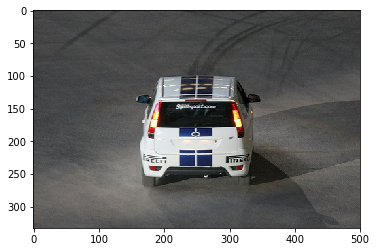

In [7]:
plt.imshow(img)

In [8]:
len(pb)

3

In [9]:
pb[1].shape

(8732,)

In [10]:
anchor_idx_ary = np.nonzero(pb[1]-cfg.class_num)[0]

In [11]:
anchor_idx_ary

array([6737, 6742, 6743, 6749, 6851, 6853, 6856, 6857, 6859, 6862, 6863,
       6865, 6965, 6967, 6970, 6971, 6973, 6976, 6977, 6979, 7079, 7084,
       7085, 7090, 7091, 7198, 7199, 8206, 8207, 8209, 8212, 8213, 8215,
       8266, 8267, 8269, 8272, 8273, 8275, 8329, 8614, 8617])

In [12]:
anchor_loc_ary = pb[2][anchor_idx_ary]
anchor_ary = cfg.all_anchors[anchor_idx_ary]

In [13]:
# draw the gt box
anchor_img = np.copy(img)
xmin = 156
ymin = 97
xmax = 351
ymax = 270
anchor_img = cv2.rectangle(anchor_img,
                           (int(xmin), int(ymin)),                     
                           (int(xmax), int(ymax)),
                           (0, 255, 0),                
                           3)

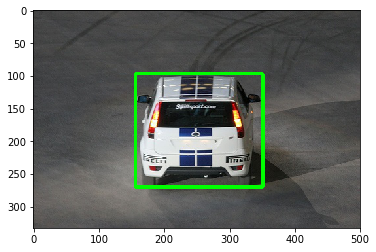

In [14]:
plt.imshow(anchor_img)

In [15]:
anchor_ary.shape

(42, 6)

In [16]:
for anchor in anchor_ary:
    x, y, w, h = anchor[:4]
    xmin = (x - w / 2) * width
    xmax = (x + w / 2) * width
    ymin = (y - h / 2) * height
    ymax = (y + h / 2) * height
#     import pdb
#     pdb.set_trace()
    anchor_img = cv2.rectangle(anchor_img,
                               (int(xmin), int(ymin)),                     
                               (int(xmax), int(ymax)),
                               (0, 0, 255),                
                               3)

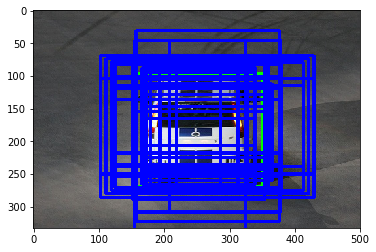

In [17]:
plt.imshow(anchor_img)

In [18]:
box_img = np.copy(img)

In [20]:
for idx, encode_box in enumerate(anchor_loc_ary):
    anchor_box = anchor_ary[idx]
    anchor_box = Box(*anchor_box[:4])
    decoded_box = decode_box(encode_box, anchor_box)
    xmin = (decoded_box.x - decoded_box.w / 2) * width
    xmax = (decoded_box.x + decoded_box.w / 2) * width
    ymin = (decoded_box.y - decoded_box.h / 2) * height
    ymax = (decoded_box.y + decoded_box.h / 2) * height
    box_img = cv2.rectangle(box_img,
                            (int(xmin), int(ymin)),                     
                            (int(xmax), int(ymax)),
                            (255, 0, 0),                
                            3)

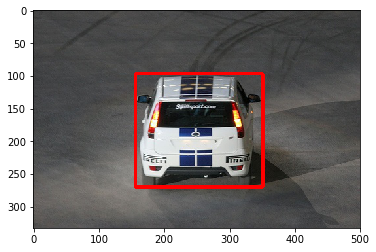

In [21]:
plt.imshow(box_img)